# Technology Innovation 510
## Image Processing in Action

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

<br>


---

<br>

🖼️ For the first part of our session today we will be reviewing image processing strategies to prepare us for lab 3 🤓 🎉

<br>

---

## Importing Packages

Let's import our packages for this session...

In [114]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
import pandas as pd
import copy
from google.colab.patches import cv2_imshow

# Loading and inspecting images with skimage and pyplot

Load an image that comes with the library and inpect it.

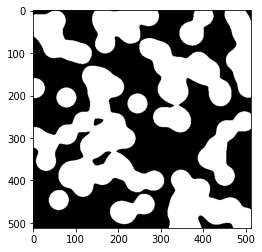

In [115]:
# we can access different images under skimage.data
# check the auto suggestions for other images
img = data.binary_blobs()
plt.imshow(img, cmap='gray')

There are a handful of different attributes we might be interested in:

* `shape`
* `dtype`
* `min`, `max`, `mean`

(500, 500, 4)
<class 'numpy.ndarray'>
uint8
0 255
199.809231


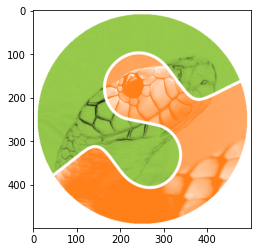

In [116]:
logo_img = data.logo()
print(logo_img.shape) #4th channel for transparency
print(type(logo_img))
print(logo_img.dtype)
print(logo_img.min(), logo_img.max())
print(logo_img.mean())
plt.imshow(logo_img) 
# plt.savefig('logocolor.svg', transparent=True)

There are a few mathematical options for [converting color to grayscale](https://www.dynamsoft.com/blog/insights/image-processing/image-processing-101-color-space-conversion/)

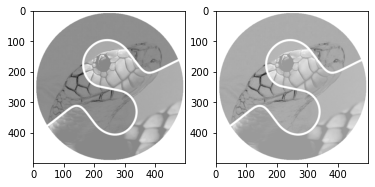

In [117]:
fig, axs = plt.subplots(1,2)
# converting to grayscale using the average method
grey_img = np.sum(logo_img,axis=2)/3
axs[0].imshow(grey_img, cmap='gray')

# there is also the luminosity method, according to our sensitivity ot different
# wavelengths, r g b
# Grayscale  = 0.299R + 0.587G + 0.114B
lumin_img = np.dot(logo_img[:,:,:3], 
                   np.array([.299, 0.587, 0.114]).reshape(-1,1)).reshape(500,500)
axs[1].imshow(lumin_img, cmap='gray')
# plt.savefig('logogray.svg', transparent=True)

We can use monadic (pixel to pixel) operations to convert grayscale to black and white

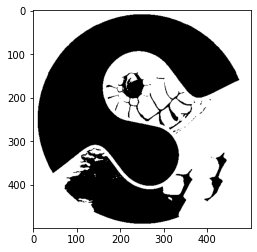

In [118]:
grey_img.shape
bw_img = copy.copy(grey_img)
threshold = 230
bw_img[bw_img > threshold] = 255
bw_img[bw_img <= threshold] = 0

bw_img
plt.imshow(bw_img, cmap='gray')


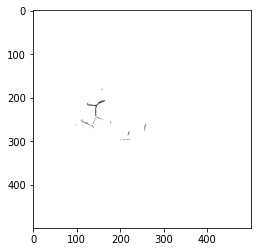

In [119]:
bw_img = copy.copy(grey_img)
threshold = 127
bw_img[bw_img > threshold] = 255
bw_img[bw_img <= threshold] = 0
plt.imshow(bw_img, cmap='gray')
# plt.savefig('logobw.svg', transparent=True)

## Images as Arrays

Let's take some examples from the slide deck earlier. And perform an exercise around them

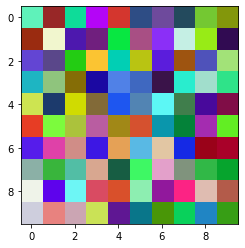

In [120]:
np.random.seed(42) #seed is for repeatability of random random fn for same number 

# make some random pixel data
arr = np.random.random(size=(10,10,3))*255

# convert to int to work well with imshow()
arr = arr.astype(int)

plt.imshow(arr)
# plt.savefig('random.svg', transparent=True)
# pd.DataFrame(arr[:,:,2]).to_excel('arr4.xlsx', index=False)

### Exercise 1: convert image to grayscale

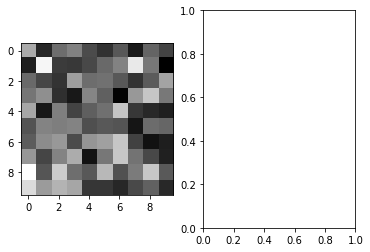

In [121]:
fig, axs = plt.subplots(1,2)

arr.shape
gray = np.sum(arr, axis = 2)/3
axs[0].imshow(bw_arr, cmap = 'gray')

# lumin_imgarr = np.dot(arr[:,:,:2], np.array[.299, 0.587, 0.114] )

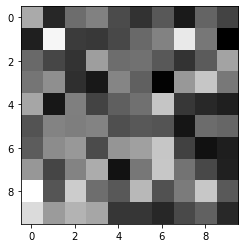

In [122]:
gray = np.sum(arr, axis = 2)/3
plt.imshow(gray, cmap='gray')
gray = gray.astype(int)
# plt.savefig('gray.svg', transparent=True)
# pd.DataFrame(gray).to_excel('gray.xlsx', index=False)

Once we've created the black and white image, we can convert to grayscale using thresholding.

127.5


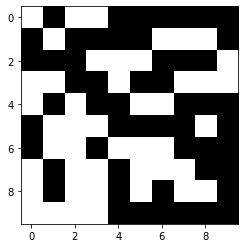

In [123]:
bw = copy.copy(gray)
# bw = np.zeros(gray.shape)
threshold = 255/2
print(threshold)
bw[bw > threshold] = 255
bw[bw <= threshold] = 0
bw = bw.astype(int)
plt.imshow(bw, cmap='gray')
# plt.savefig('bw.svg', transparent=True)
# pd.DataFrame(bw).to_excel('bw.xlsx', index=False)

## Local Operators: Linear Filtering 
### (And not explicitly defining the kernel)

<p align="center">
<img src="https://raw.githubusercontent.com/wesleybeckner/technin510/main/assets/l3_linear_filtering.png" width=600px></img>

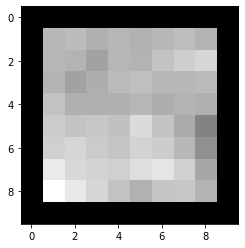

In [124]:
h, w = gray.shape
new_img = np.zeros((h, w))
for i in range(1,h-1):
  for j in range(1,w-1):
    new_img[i,j] = (np.sum(gray[i-1:i+2,j-1:j+2])/9).astype(int)
plt.imshow(new_img, cmap='gray')
# plt.savefig('linearfilter.svg', transparent=True)
# pd.DataFrame(new_img).to_excel('linearfilter.xlsx', index=False)

In the above `k=1` and the image was very small (10x10 pixels). What happens when we apply this filter on a larger scale; a larger image and larger value of k?

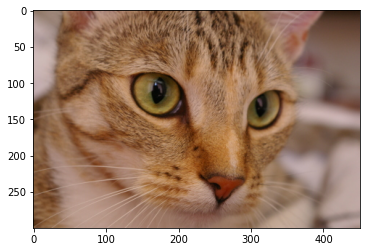

In [125]:
img = data.chelsea()
plt.imshow(img)

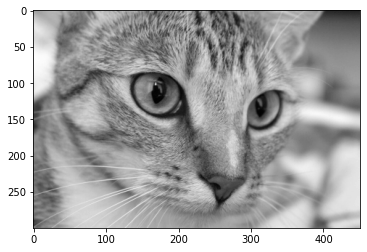

In [126]:
img = data.chelsea()
img_gray = img.sum(axis=2)/3
plt.imshow(img_gray, cmap='gray')

1600
(300, 451)


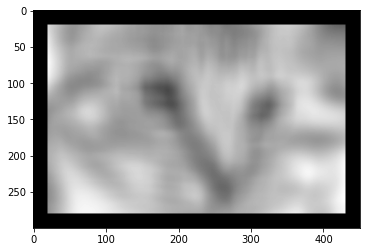

In [141]:
h, w = img_gray.shape
new_img = np.zeros((h, w))
k=20
weight = (2*k)**2
print(weight)
print(img_gray.shape)
for i in range(k,h-k):
  for j in range(k,w-k):
    new_img[i,j] = (np.sum(img_gray[i-k:i+k,j-k:j+k])/weight).astype(int)
plt.imshow(new_img, cmap='gray')
# plt.savefig('linearfilter.svg', transparent=True)
# pd.DataFrame(new_img).to_excel('linearfilter.xlsx', index=False)

## Local Operators: Sobel

### (And explicitly defining the kernel)

That's great, but let's formalize this a bit. Often we'll be talking about _kernels_ and applying them to an input. We visited this idea this past summer in fundamentals when talking about [convolutional neural networks](https://github.com/wesleybeckner/technology_fundamentals/blob/main/C4%20Machine%20Learning%20II/Tech_Fun_C4_S1_Computer_Vision_Part_1.ipynb).

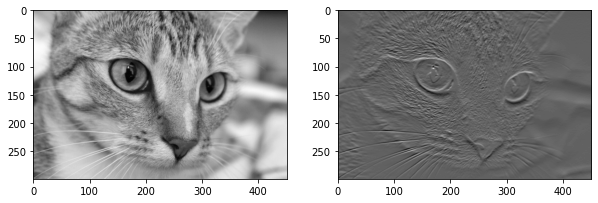

In [128]:
fig, axs = plt.subplots(1,2, figsize=(10,5))


# example with color
input_image = img_gray
axs[0].imshow(input_image, cmap='gray')

if input_image.ndim == 2:
  inp_type = 'gray'
elif input_image.ndim == 3:
  inp_type = 'color'


# Here I will define the kernel(s)

# kernel, 1/9
kernel = [[0.111, 0.111, 0.111],
          [0.111, 0.111, 0.111],
          [0.111, 0.111, 0.111]]

# kernel, bottom Sobel
kernel = np.array([[1,2,1],
          [0,0,0],
          [-1,-2,-1]])

# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = np.zeros(input_image.shape)

# Compute convolution with kernel
for x in range(offset, input_image.shape[0] - offset):
    for y in range(offset, input_image.shape[1] - offset):

        # operations will be on 1 or 3 elements depending on whether gray/color
        if inp_type == 'color':
          acc = [0, 0, 0]
        else:
          acc = 0

        # Now perform the kernel mathematics with for loops
        # Notice how it is much slower than using Numpy Vectorization!
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_image[xn, yn]

                if inp_type == 'color':
                  acc[0] += pixel[0] * kernel[a][b]
                  acc[1] += pixel[1] * kernel[a][b]
                  acc[2] += pixel[2] * kernel[a][b]
                else:
                  acc += pixel * kernel[a][b]
        if inp_type == 'color':
          output_image[x, y] = int(acc[0]), int(acc[1]), int(acc[2])
        else:
          output_image[x, y] = int(acc)
axs[1].imshow(output_image, cmap='gray')

## Local Operators: Gaussian Filter

### (And explicitly defining the kernel and using numpy vectorization)

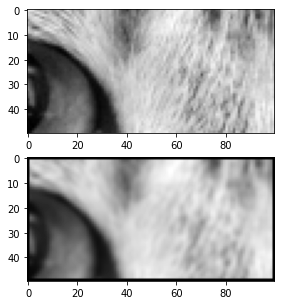

In [142]:
fig, axs = plt.subplots(2,1, figsize=(5,5))
sub = img_gray[75:125,175:275]

axs[0].imshow(sub,cmap='gray')


h, w = sub.shape
new_img = np.zeros((h, w))
k=1
kernel = np.array([[1,2,1],
                  [2,4,2],
                  [1,2,1]])/16
# kernel = np.array([[1,1,1],
#                   [1,1,1],
#                   [1,1,1]])/9
for i in range(1,h-1):
  for j in range(1,w-1):
    # note top bound is exclusive (k+1)
    new_img[i,j] = np.sum(sub[i-k:i+k+1,j-k:j+k+1]*kernel)
axs[1].imshow(new_img, cmap='gray')

# pd.DataFrame(new_img).to_excel('linearfilter.xlsx', index=False)

By the way, if we want to be truly disciplined, we can replace all the for loops in this operation with numpy vectorization. This will speed up our algorithm

(3, 3, 48, 98)


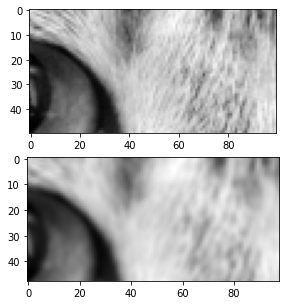

In [130]:
fig, axs = plt.subplots(2,1, figsize=(5,5))
sub = img_gray[75:125,175:275]

axs[0].imshow(sub,cmap='gray')

kernel = np.array([[1,2,1],
                  [2,4,2],
                  [1,2,1]])/16
pre_img = np.array([[sub[:-2,:-2], sub[1:-1,:-2], sub[2:,:-2]],
          [sub[:-2,1:-1], sub[1:-1,1:-1], sub[2:,1:-1]],
         [sub[:-2,2:], sub[1:-1,2:], sub[2:,2:]]])

print(pre_img.shape)
new_img = np.dot(pre_img.transpose(), kernel).sum(axis=3).sum(axis=2)
axs[1].imshow(new_img.transpose(), cmap='gray')

### Exercise 2: apply your own local operators

use the following cell to apply different kernels to an in put image of your choice. You can find suggested kernels [here](https://setosa.io/ev/image-kernels/)

Note in the following skeleton code, the actual output image is shifted. How would you improve this? (There is one suggested improvement from above where we used nested for loops)

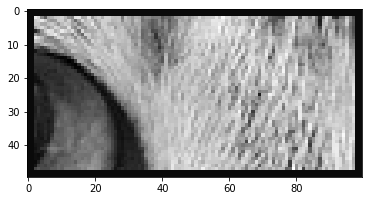

In [162]:
#######################################
### set your input array image here ###
sub = img_gray[75:125,175:275]
#######################################
h, w = sub.shape
new_img = np.zeros((h, w))
k=3
#######################################
######## define your kernel here ######
# right sobel
kernel = np.array([[-1,-1,-1],
                  [-1,16,-1],
                  [-1,-1,-1]])
#######################################

for i in range(2,h-2):
  for j in range(2,w-2):
    new_img[i,j] = np.sum(sub[i:i+k,j:j+k]*kernel)
plt.imshow(new_img, cmap='gray')

# More on Loading Images

[from Tech Fundamentals](https://render.githubusercontent.com/view/ipynb?color_mode=light&commit=6e91cf4bfd71b7215a75cdb09d2b25dee45943f4&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f7765736c65796265636b6e65722f746563686e6f6c6f67795f66756e64616d656e74616c732f366539316366346266643731623732313561373563646230396432623235646565343539343366342f43342532304d616368696e652532304c6561726e696e6725323049492f546563685f46756e5f43345f53315f436f6d70757465725f566973696f6e5f506172745f312e6970796e62&nwo=wesleybeckner%2Ftechnology_fundamentals&path=C4+Machine+Learning+II%2FTech_Fun_C4_S1_Computer_Vision_Part_1.ipynb&repository_id=384268836&repository_type=Repository#3.0.2-Load-Dataset-+-Segway-Into-Images)